# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstname_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Friday, 6 April, 2018, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from a mobile phone company concerned with reducing customer churn. Customer churn happens when a customer switches mobile operator. The company wants to use the data collected about their customers to build a data analytics solution for customer churn prediction.
Our goal is to work with the data to build and evaluate prediction models that capture the relationship between the descriptive features and the target feature 'Churn'. We use the same dataset from Homework1 (you can use your cleaned/prepared CSV from Homework1 or start from the raw dataset, clean it according to concepts covered in the lectures/labs, then use it for training prediction models).
 
There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 30% shown as [30].


(1). [30] **Data Understanding:** Exploring relationships between feature pairs and selecting promising features.
    - (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside. 
    - (1.2) On the training set:
        - Plot the correlations between all the continuous features. Discuss what you see in these plots.
        - For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising. Justify your choices.
        - For each categorical feature, plot the pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [25] **Predictive Modeling:** Linear Regression.  
    - (2.1) On the training set, train a linear regression model to predict the target feature Churn, using only the descriptive features selected in exercise (1) above. 
    - (2.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    
    - (2.3) Print the predicted target feature value for the first 100 training examples. Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (2.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).
    
(3). [25] **Predictive Modeling:** Logistic Regression.  
    - (3.1) On the training set, train a logistic regression model to predict the target feature Churn, using the descriptive features selected in exercise (1) above.   
    - (3.2) Print the coefficients learned by the model and discuss their role in the model (e.g., interpret the model).    
    - (3.3) Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples. Print the classification evaluation measures computed on the training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.
    - (3.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).
    
(4). [20] **Improving Predictive Models.**
    - (4.1) Which model of the ones trained above performs better at predicting Churn? Is it more accurate than a simple (but useless) model that always predicts the majority class (i.e., if Churn=0 is the majority class in your dataset, the simple model always predicts 0 for the target feature)? Justify your answers.
    - (4.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.

# (1) DATA UNDERSTANDING

*This is the main body of Homework 2. It works off the FixedChurn csv that was created in the other notebook, **Fixing-Homework-1.** You can take a look at Fixing-Homework-1 to see how this csv came to be.*

To start, I will import all necessary modules (for the first two parts, at least) and set up some basic features like pandas display options.

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pylab as lab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.formula.api as sm
import seaborn as sns

%matplotlib inline
df = pd.read_csv('FixedChurn-17205709.csv')
pd.set_option("display.max_columns", 40)
pd.set_option("display.max_rows", 100)
pd.options.mode.chained_assignment = None
print(df.shape)
df.head(10)

(1000, 33)


,customer,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,creditRatingNum,numRetentionOffersRejected
0,1074015,NaN,unknown,False,0,1,403,True,0.00,G,True,False,42.79,1097.75,44.99,18.75,0.00,-11.575,-0.1560,0.00,0.00,0.00,0.000000,-15.071609,0.00,14,0.00,0,0,1,False,1,0
1,1067357,70.0,no,False,7,2,279,True,29.99,E,False,True,62.22,605.50,41.28,47.75,0.00,1.390,-0.4446,200.54,37.33,20.33,1.000000,-1.635469,9.67,11,3.67,0,0,0,False,3,0
2,1014203,52.0,yes,True,8,2,5,False,29.99,G,False,True,35.75,558.50,44.99,0.00,0.52,-4.110,0.0104,120.13,59.00,19.00,0.435185,10.818753,3.00,31,0.00,0,0,0,False,1,0
3,1061952,NaN,unknown,False,0,1,478,True,0.00,D,True,False,55.37,362.50,39.99,72.50,0.00,-6.090,-0.5076,111.59,16.00,21.33,0.758830,1.734207,8.00,16,0.00,0,0,0,False,4,0
4,1059557,26.0,no,False,3,1,430,True,0.00,B,False,True,33.85,246.25,30.00,0.00,0.00,4.475,0.1210,45.73,7.00,2.00,0.554500,-4.839611,5.33,15,0.33,0,0,0,False,6,0
5,1004312,34.0,yes,True,6,1,1137,False,0.00,F,False,True,49.99,327.00,49.99,0.00,0.00,-0.620,0.0000,35.27,30.67,1.33,2.067042,15.037492,4.00,38,0.00,0,0,0,True,2,0
6,1049232,NaN,unknown,False,9,1,506,True,0.00,B,False,True,127.12,953.25,49.99,213.50,0.00,7.775,0.0734,229.70,89.67,33.00,2.818608,16.275749,15.67,17,0.00,0,0,0,False,6,0
7,1043401,NaN,unknown,False,0,2,222,True,149.99,C,True,False,60.65,634.50,49.99,0.00,0.00,-5.330,-0.1022,106.80,35.67,15.67,0.750707,11.255496,18.00,17,0.33,0,0,0,False,5,0
8,1082587,52.0,no,False,2,1,264,True,0.00,B,False,True,35.16,59.00,39.99,0.00,5.17,0.400,-0.1034,0.00,0.33,0.00,0.570815,-13.725407,0.33,9,0.00,0,0,0,False,6,0
9,1053535,58.0,unknown,False,6,1,361,True,0.00,B,False,True,30.26,112.50,39.99,0.00,0.00,0.550,-0.0054,0.49,1.00,0.00,4.055292,-9.824126,1.33,12,0.67,0,0,0,False,6,0


Looking at datatypes

In [2]:
df.dtypes

customer                        int64
age                           float64
marriageStatus                 object
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
currentHandsetPrice           float64
creditRating                   object
homeOwner                        bool
creditCard                       bool
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCus

Separating my columns into numeric and categorical. Converting all object features to categorical.

I'm setting the customer field as 'object'. This is to prevent the field from being counted among the other numerical features in the num_columns list.

I'm also setting the churn feature to be an int, and including it with the numerical features. This is for the sake of part 2, where I will need to treat the churn feature as a target for linear regression.

In [3]:
cat_columns = ['marriageStatus',
              'children', 'smartPhone', 'creditRating',
              'homeOwner', 'creditCard']

for column in cat_columns:
    df[column] = df[column].astype('category')

df['customer'] = df['customer'].astype('object')

df['churn'] = df['churn'].astype('int64')

num_columns = df.select_dtypes(['int64','float64']).columns

## Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test.

Next I'll randomly shuffle my rows. Note from the index numbers below that the order has been randomised.

In [4]:
df = shuffle(df)
df.head(5)

,customer,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,creditRatingNum,numRetentionOffersRejected
969,1034927,42.0,unknown,False,7,1,543,False,0.0,E,False,True,51.74,333.00,49.99,1.25,1.44,3.440,-0.0550,15.68,14.67,3.67,1.342895,12.686218,2.67,18,1.00,0,0,0,0,3,0
239,1047066,38.0,unknown,False,8,1,526,False,0.0,B,False,True,49.99,24.00,59.99,0.00,0.00,0.060,0.0000,0.17,2.33,0.33,2.335000,6.557107,0.33,18,0.00,0,0,3,1,6,0
808,1072916,54.0,yes,False,5,1,240,True,0.0,A,False,True,58.36,356.50,44.99,62.75,0.00,-2.030,-0.4674,0.00,0.00,0.00,0.000000,-8.700904,0.00,8,0.00,0,0,0,0,7,0
55,1078455,24.0,no,False,6,1,384,True,0.0,B,False,True,35.73,613.50,44.99,0.00,0.00,-2.550,0.0446,83.37,23.67,17.67,0.694629,-17.863755,4.00,13,1.67,0,0,0,0,6,0
164,1030982,28.0,no,False,7,1,632,True,0.0,B,True,False,182.32,2582.25,54.98,308.50,0.00,-5.245,-1.2154,1014.36,160.33,34.67,0.746545,-8.367647,39.67,21,0.00,0,0,0,0,6,0


*"Here's one I made earlier"*

For the sake of consistency across my test results, I saved a previously shuffled csv (see commented-out line below) and will now load from that csv, to use as my shuffled dataframe for the rest of the notebook.

If you want you can uncomment the top line (or comment out both lines) and click run all again. This will provide a fresh, randomly shuffled dataset to work with, but may produce different results for the test and train sets.

In [5]:
# df.to_csv('ShuffledChurn.csv', index=False)
df = pd.read_csv('ShuffledChurn.csv')

Splitting the shuffled dataframe in two.

In [6]:
limit = df.shape[0] * 7 // 10 # 70:30 split
df_train = df[:limit]
df_test = df[limit:]

In [7]:
print("Training table - Rows:", df_train.shape[0], "- Columns:", df_train.shape[1])
df_train.head(5)

Training table - Rows: 700 - Columns: 33


,customer,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,creditRatingNum,numRetentionOffersRejected
0,1046672,54.0,no,False,3,1,591,True,0.00,B,False,True,49.99,381.50,59.99,0.00,0.00,0.190,0.0000,183.89,54.67,0.00,2.983659,-2.248519,5.67,20,0.00,0,0,0,1,6,0
1,1039042,32.0,yes,False,7,1,666,True,0.00,E,False,True,34.99,697.75,44.99,0.00,0.00,4.365,0.0000,87.39,11.67,4.67,1.220037,20.254980,4.33,22,0.00,0,0,0,0,3,0
2,1056652,54.0,yes,False,6,1,446,True,0.00,D,False,True,22.27,13.75,29.27,1.25,0.00,0.225,-0.0054,0.00,0.33,0.00,0.210111,-4.923477,0.33,15,0.00,0,0,0,1,4,0
3,1090015,NaN,unknown,False,0,3,42,False,129.99,E,True,False,152.45,1208.75,62.49,234.25,0.27,11.805,2.5546,384.86,27.00,14.00,0.930806,10.098975,57.33,11,4.67,0,0,0,0,3,0
4,1060820,54.0,unknown,True,8,2,82,True,199.99,D,False,False,75.64,1188.00,59.99,63.00,0.00,5.180,0.8204,319.43,89.67,18.00,0.783243,16.021041,18.00,12,4.67,0,0,0,0,4,0


In [8]:
print("Test table - Rows:", df_test.shape[0], "- Columns:", df_test.shape[1])
df_test.head(5)

Test table - Rows: 300 - Columns: 33


,customer,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,creditRatingNum,numRetentionOffersRejected
700,1039383,NaN,unknown,False,0,2,513,True,149.99,D,True,False,85.20,0.50,82.52,0.00,0.00,-0.010,0.3608,0.00,0.00,0.0,2.030303,-5.730004,0.00,20,0.33,0,0,0,0,4,0
701,1008510,34.0,yes,True,8,1,1081,False,0.00,A,False,True,23.12,76.25,24.68,2.75,0.00,-0.225,-0.2624,27.28,2.33,4.0,1.286174,-4.394055,0.33,36,0.00,1,1,0,1,7,0
702,1005470,46.0,yes,True,6,4,12,True,59.99,C,False,True,41.28,244.00,22.74,0.00,0.00,0.860,0.7836,6.67,0.00,0.0,4.670000,-0.848898,0.00,38,0.00,2,1,0,0,5,1
703,1050521,NaN,unknown,False,0,4,195,True,79.99,D,True,False,62.35,760.00,49.99,0.00,0.00,-5.480,-0.0832,174.21,4.67,2.0,1.543835,0.401168,111.67,15,8.67,0,0,0,1,4,0
704,1083582,38.0,no,False,2,2,101,True,149.99,B,False,True,102.80,824.00,44.99,149.50,10.63,11.660,2.3140,0.00,0.00,0.0,0.000000,7.060423,1.33,11,0.00,0,0,0,1,6,0


## Plot the correlations between all the continuous features. Discuss what you see in these plots.

In [9]:
print("\nCorrelations between all continuous features:\n")
df_train[num_columns].corr()


Correlations between all continuous features:



,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,creditRatingNum,numRetentionOffersRejected
age,1.000000,0.174305,-0.020283,-0.054514,-0.050823,-0.064308,-0.098199,-0.061815,-0.028053,0.019478,-0.028687,0.014048,-0.089993,-0.119164,-0.125577,-0.046868,-0.048755,-0.050522,-0.029135,-0.006502,-0.043149,-0.011985,0.015151,-0.030555,0.091703,-0.042388
income,0.174305,1.000000,0.009473,0.060867,0.003064,-0.073122,-0.168445,-0.140143,-0.005261,0.001220,0.068985,-0.001456,-0.151769,-0.127586,-0.109183,0.097934,-0.000806,-0.159807,0.118016,-0.117262,-0.009159,-0.008646,0.002427,-0.028886,0.296845,-0.005471
numHandsets,-0.020283,0.009473,1.000000,-0.380707,0.507593,0.235666,0.286851,0.280885,0.093067,0.048680,0.039914,0.045088,0.241701,0.192082,0.235704,0.041919,-0.046856,0.182944,0.433584,0.067592,0.143796,0.116012,0.075334,-0.067615,-0.060653,0.098829
handsetAge,-0.054514,0.060867,-0.380707,1.000000,-0.415104,-0.203657,-0.295936,-0.224096,-0.120627,-0.057448,-0.053542,-0.092118,-0.230420,-0.230820,-0.222904,0.100975,0.007452,-0.247275,0.397864,-0.180908,-0.045164,-0.095247,-0.078980,0.119197,0.178923,0.007526
currentHandsetPrice,-0.050823,0.003064,0.507593,-0.415104,1.000000,0.232323,0.269006,0.200023,0.149899,0.030649,0.049769,0.066088,0.231549,0.227798,0.283744,-0.023180,0.046063,0.195483,0.052909,0.089801,0.040136,0.068305,-0.041524,0.002181,-0.081991,0.004027
avgBill,-0.064308,-0.073122,0.235666,-0.203657,0.232323,1.000000,0.709646,0.572411,0.847806,0.272259,0.041538,0.055206,0.676131,0.482630,0.390575,-0.035826,0.034741,0.465161,0.018230,0.220076,0.076400,0.060897,0.033415,-0.047523,-0.102079,0.052994
avgMins,-0.098199,-0.168445,0.286851,-0.295936,0.269006,0.709646,1.000000,0.559758,0.535468,0.157604,-0.025764,0.031614,0.817512,0.741271,0.575089,-0.159961,0.038127,0.611313,-0.051947,0.425409,0.052007,0.063126,0.040890,-0.135796,-0.151006,0.021863
avgrecurringCharge,-0.061815,-0.140143,0.280885,-0.224096,0.200023,0.572411,0.559758,1.000000,0.120494,0.157240,0.024186,0.014574,0.401529,0.387557,0.260542,0.007075,0.074087,0.330742,0.036574,0.167982,0.040320,0.050273,-0.005834,-0.101566,-0.110118,0.016076
avgOverBundleMins,-0.028053,-0.005261,0.093067,-0.120627,0.149899,0.847806,0.535468,0.120494,1.000000,0.110483,0.013743,0.027901,0.596833,0.364747,0.326166,-0.055178,-0.000040,0.355999,-0.027747,0.145578,0.068976,0.033091,0.033811,0.015163,-0.026057,0.062199
avgRoamCalls,0.019478,0.001220,0.048680,-0.057448,0.030649,0.272259,0.157604,0.157240,0.110483,1.000000,0.063391,0.139964,0.119615,0.017858,0.013539,-0.004103,-0.002367,0.135173,-0.050121,0.023328,-0.028265,-0.023076,0.077159,-0.027814,-0.165412,-0.019248


As there are far too many features above to assess each individually, I will use the code below to isolate only the correlations with a value of less than -0.5 or greater than +0.5.

In [10]:
# Scan for correlations greater than 0.5 or less than -0.5
print("Continuous features with strong positive or negative correlation:\n")
for i in range(len(num_columns)):
    column_a = num_columns[i]
    for column_b in num_columns[i+1:]:        
        if column_a != column_b:
            correlation = df_train[[column_a, column_b]].corr().as_matrix()[0,1]
            if correlation > 0.5 or correlation < -0.5:
                print(column_a, "~", column_b, "=", correlation, '\n')

Continuous features with strong positive or negative correlation:

numHandsets ~ currentHandsetPrice = 0.5075927944457327 

avgBill ~ avgMins = 0.709645713897716 

avgBill ~ avgrecurringCharge = 0.5724106833746612 

avgBill ~ avgOverBundleMins = 0.8478059212082543 

avgBill ~ avgReceivedMins = 0.6761310525008934 

avgMins ~ avgrecurringCharge = 0.559758384750949 

avgMins ~ avgOverBundleMins = 0.5354676958825999 

avgMins ~ avgReceivedMins = 0.8175123817175352 

avgMins ~ avgOutCalls = 0.7412713367069742 

avgMins ~ avgInCalls = 0.575088792298801 

avgMins ~ avgDroppedCalls = 0.6113131510640467 

avgOverBundleMins ~ avgReceivedMins = 0.5968333372855648 

callMinutesChangePct ~ billAmountChangePct = 0.6988593012355594 

avgReceivedMins ~ avgOutCalls = 0.6281423214088884 

avgReceivedMins ~ avgInCalls = 0.6519944472035042 

avgReceivedMins ~ avgDroppedCalls = 0.5118477979515851 

avgOutCalls ~ avgInCalls = 0.6796422665984833 

avgOutCalls ~ avgDroppedCalls = 0.5155687933867079 

numReten

Strong correlation between Minutes and Bills and Calls across multiple subfields of all three, as expected. Also strong correlations between Retention Calls and the subsets of Retention Calls, naturally. The most interesting pairing to emerge from this set is the (relatively) high correlation of **numHandsets** and **currentHandsetPrice**. It seems that customers with more expensive phones also have more phones overall, indicating that if a customer owns at least one expensive phone, they are more likely to own many phones, and vice versa.

It will be worth keeping an eye on all of these correlations as we go forward, to note whether the features we use for prediction overlap at all.

Unfortunately, none of these features indicate strong positive or negative correlation with churn.

## For each continuous feature, plot its interaction with the target feature. Discuss what you observe from these plots. Choose a subset of continuous features you find promising. Justify your choices.

Rather than producing plots based on every single numerical feature, I'll take a look at the top 5 most positively and negatively correlated numerical features with churn, and build scatter plots around them.

In [11]:
churn_correlations = []

churn_df = pd.DataFrame(columns=['column', 'correlation'])

count = 0
for index in range(len(num_columns)):
    correlation = df_train[[num_columns[index], 'churn']].corr().as_matrix()[0,1]
    churn_df.loc[index] = [num_columns[index], correlation]
churn_df = churn_df[churn_df["column"] != "churn"]

In [12]:
print("Numerical features most positively correlated with churn:")

churn_df.sort_values(by = 'correlation', ascending = False).head(5)

Numerical features most positively correlated with churn:


,column,correlation
3,handsetAge,0.119197
25,numRetentionOffersRejected,0.074295
24,creditRatingNum,0.067780
20,numRetentionCalls,0.054498
8,avgOverBundleMins,0.015163


In [13]:
print("Numerical features most negatively correlated with churn:")

churn_df.sort_values(by = 'correlation').head(5)

Numerical features most negatively correlated with churn:


,column,correlation
6,avgMins,-0.135796
7,avgrecurringCharge,-0.101566
13,avgOutCalls,-0.101171
14,avgInCalls,-0.079135
22,newFrequentNumbers,-0.076325


Scatter plots of most significant numerical features with churn.

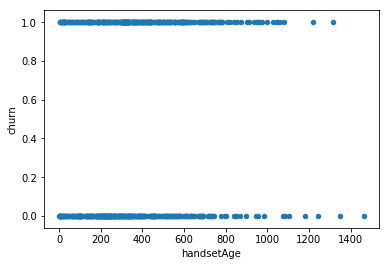

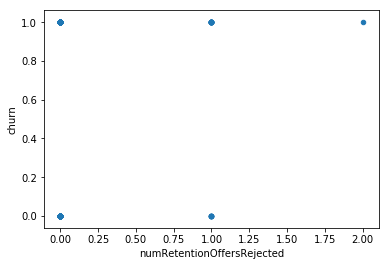

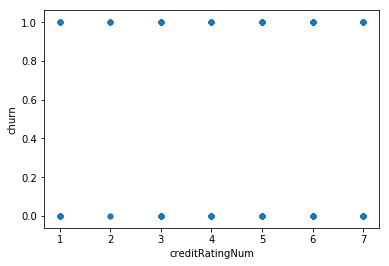

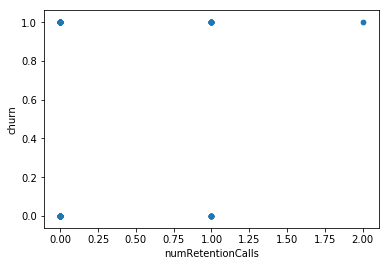

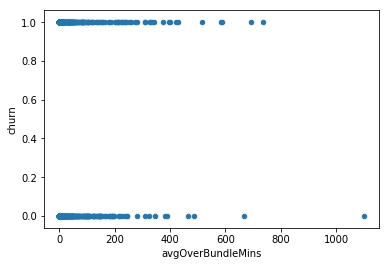

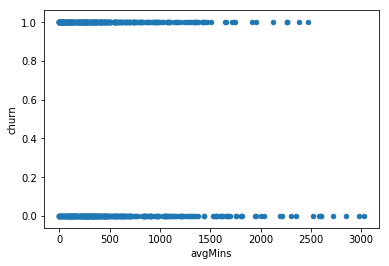

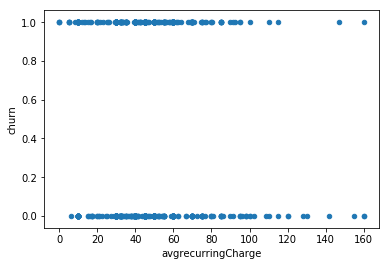

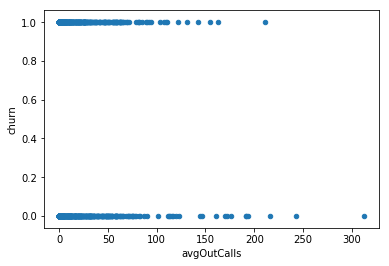

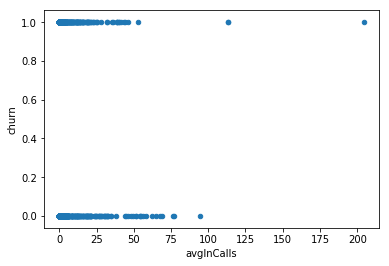

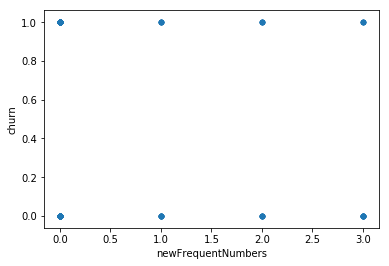

In [14]:
feature_list = ['handsetAge', 'numRetentionOffersRejected', 'creditRatingNum', 
                'numRetentionCalls', 'avgOverBundleMins', 'avgMins', 
                'avgrecurringCharge', 'avgOutCalls', 'avgInCalls', 'newFrequentNumbers']

for feature in feature_list:
    df_train.plot(kind='scatter', x=feature, y='churn')

The charts don't show us much, but from the tables we can see that Credit Rating (numerical), Handset Age, and Rejected Retention Calls exhibit strong positive correlations with Churn. 

**creditRatingNum** implies that those in better financial positions are more free to change phone company if their current contract does not suit them. Those who have had their handset for longer may be interested in switching up their plan, as indicated by **handsetAge**. **numRetentionOffersRejected** also has visible correlations with churn, indicating that those who are called about retention offers and turn them down are likely to churn afterwards.

*Note that numRetentionOffersRejected and creditRatingNum are new features that were added to the dataframe in **Fixing-Homework-1**.*

On the negative side of things, **avgMins** correlates with not churning. This implies that those who use their phones regularly are less likely to churn. **avgrecurringCharge** has a similar strength. This could be related to avgMins, but with a correlation of just over *0.55* that isn't strong enough for me to discount the feature entirely. **avgOutCalls** also correlates strongly with the features, but given its strong *0.74* correlation with avgMins, it's probably best to leave it out.

Though they did not exhibit strong correlation with churn, I would haved considered the **avgBill** feature significant in that an increased bill might convince someone to churn, especially paired with avgMins. Similarly, **lifetime** is an important context for features like handsetAge. However, neither of these present any strong correlation with the target feature, so to avoid unnecessary noise I will exclude them.

## For each categorical feature, plot the pairwise interaction with the target feature. Discuss what knowledge you gain from these plots. Choose a subset of categorical features you find promising. Justify your choices.


I adapted code from one of the earlier labs to make a function that builds stacked bar charts for each categorical feature.

In [15]:
def chart_against_target(feature, target):
    values = pd.unique(df_train[feature].ravel())

    df_train['percent'] = 0

    for i in values:
        count = 1 / df_train[df_train[feature] == i].count()['churn']
        index_list = df_train[df_train[feature] == i].index.tolist()
        for ind in index_list:
            df_train.loc[ind, 'percent'] = count * 100

    group = df_train[['percent', feature, target]].groupby([feature, target]).sum()

    my_plot = group.unstack().plot(kind='bar', stacked=True, title= target + " rate based on " + feature, figsize=(15,7))

    orange_patch = mpatches.Patch(color='orange', label='True')
    blue_patch = mpatches.Patch(color='blue', label='False')
    my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

    my_plot.set_xlabel(feature)
    my_plot.set_ylabel("% " + target)
    my_plot.set_ylim([0,100])

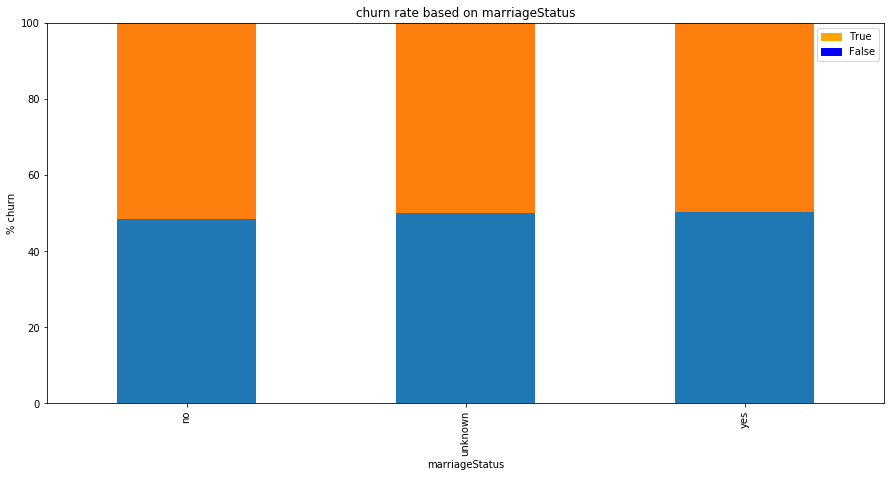

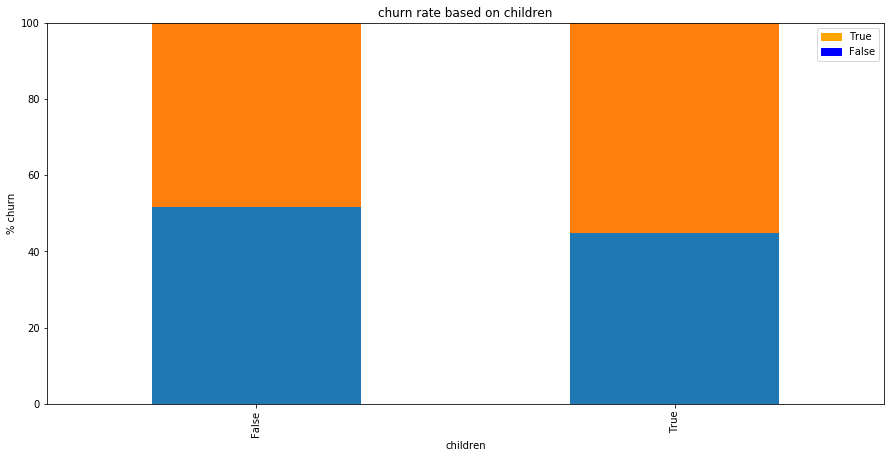

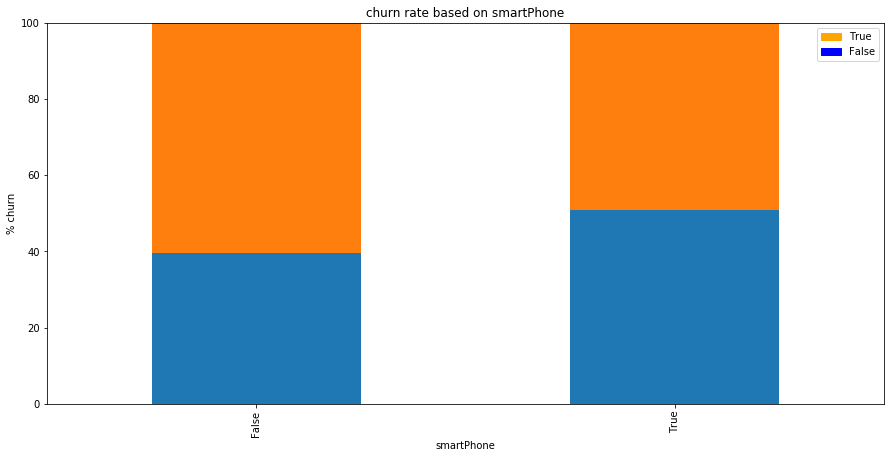

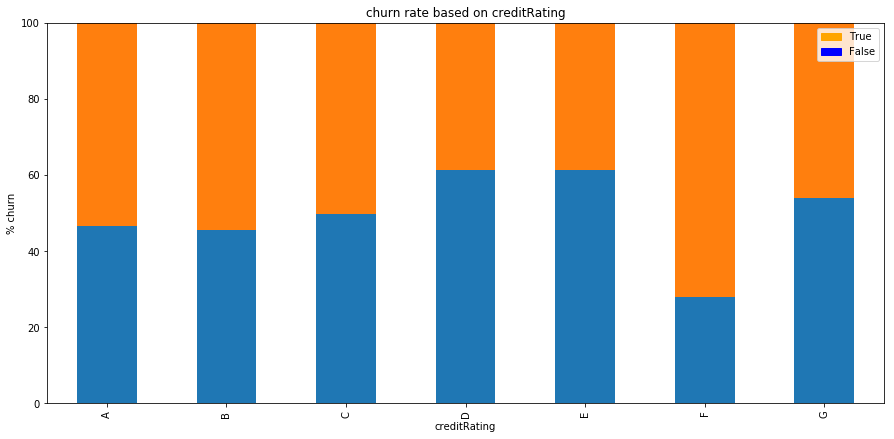

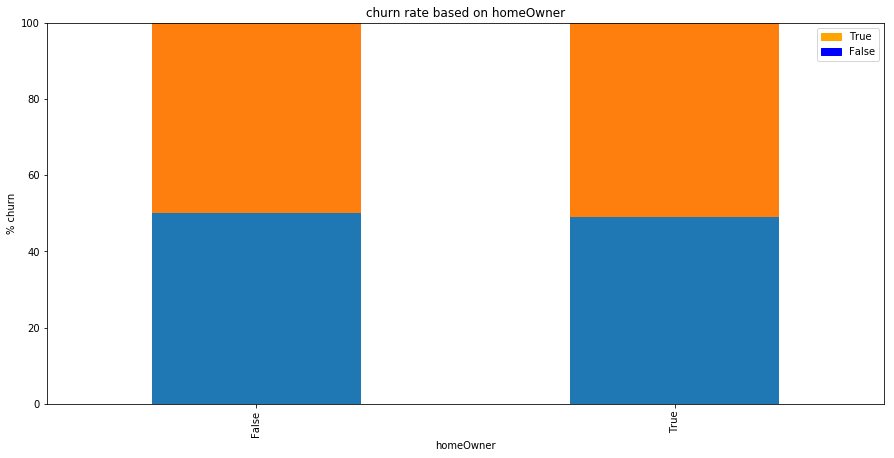

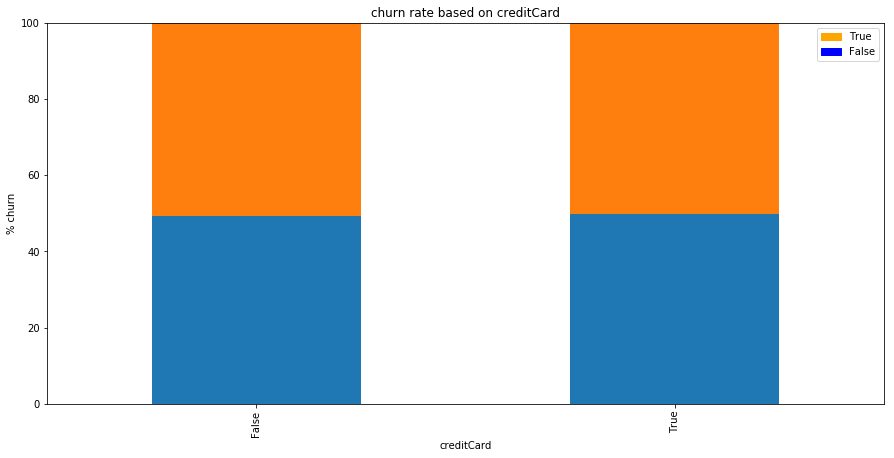

In [16]:
for feature in cat_columns:
    chart_against_target(feature, "churn")

Judging from the bar plots above, the only categorical feature to indicate a distinct signal for whether or not someone is likely to churn is **smartphone**. Those with smartphones are about 20% more likely to churn than those without. This could be because non-smartphone users are not adequately incentivised to remain with the provider, because the deals and bonuses they offer are all geared towards smartphone-users. 

In [17]:
print("Number of smartphone owners vs. non-smartphone owners: ")
df_train['smartPhone'].value_counts()

Number of smartphone owners vs. non-smartphone owners: 


True     632
False     68
Name: smartPhone, dtype: int64

It must be noted that smartphone users outweight non-smartphone users in this training set roughly 10 to 1, an imbalance that may hamper its quality as a prediction feature. Still, so long as it is not used as the sole predictive feature it could be a significant addition to the prediction algorithm.

**creditRating** also proved to have some interesting results, namely that category F seems majorly more likely to churn than any other category. But as there is no obvious reason why this should be the case, and **creditRatingNum**, the numerical conversion of creditRating, is already being used as a prediction feature, it's probably best to avoid using it.

Listing off the categorical and numerical columns that appeared most promising below.

In [18]:
promising_cat = ['smartPhone']

print("Promising Categorical Features:\n")
for feature in promising_cat:
    print("\t", feature)
print()
promising_num = [
    'creditRatingNum', 
    'handsetAge', 
    'numRetentionOffersRejected', 
    'avgMins', 
    'avgrecurringCharge',
    'avgOutCalls'
                ]

print("Promising Numerical Features: \n")
for num in promising_num:
    print('\t', num)

Promising Categorical Features:

	 smartPhone

Promising Numerical Features: 

	 creditRatingNum
	 handsetAge
	 numRetentionOffersRejected
	 avgMins
	 avgrecurringCharge
	 avgOutCalls


# (2) Predictive Modeling: Linear Regression

## On the training set, train a linear regression model to predict the target feature Churn

    - (2.2)  (e.g., interpret the model).    
    - (2.3) 
    - (2.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

Using statsmodels, the first data analytics package we were taught about, I'll build a model using the features decided upon in the previous section.

In [19]:
myformula = "churn ~ C(smartPhone) + creditRatingNum + handsetAge + numRetentionOffersRejected \
+ avgMins + avgrecurringCharge + avgOutCalls"
lm = sm.ols(formula=myformula, data=df_train).fit()

## Print the coefficients learned by the model and discuss their role in the model

In [20]:
print("Parameters and their coefficients:\n")
print(lm.params)

Parameters and their coefficients:

Intercept                     0.496111
C(smartPhone)[T.True]        -0.045339
creditRatingNum               0.012807
handsetAge                    0.000141
numRetentionOffersRejected    0.206983
avgMins                      -0.000084
avgrecurringCharge           -0.000640
avgOutCalls                  -0.000024
dtype: float64


The coefficients are the "weights" that the values of our columns will be multiplied by. However, out of context they don't tell us much. A better way of estimating the strength of a given coefficient is to multiply the coefficient by the mean value of the feature it is applied to. This will give you the "strength" of this parameter, and the scope it has to predict the target value.

In [21]:
param_list = ['smartPhone', 'creditRatingNum', 'handsetAge', 
              'numRetentionOffersRejected', 'avgMins', 'avgrecurringCharge', 'avgOutCalls']
print("Numerical stats for parameters:")
df_train[param_list].describe().T

Numerical stats for parameters:


,count,mean,std,min,25%,50%,75%,max
creditRatingNum,700.0,5.041429,1.620593,1.0,4.0000,6.000,6.0000,7.00
handsetAge,700.0,367.665714,244.425085,1.0,198.0000,325.000,505.2500,1463.00
numRetentionOffersRejected,700.0,0.034286,0.189786,0.0,0.0000,0.000,0.0000,2.00
avgMins,700.0,549.264871,538.514277,0.0,178.3125,374.125,734.5625,3024.00
avgrecurringCharge,700.0,45.927586,23.298537,0.0,30.0000,44.990,56.2200,159.99
avgOutCalls,700.0,26.330571,35.412574,0.0,4.2475,14.670,34.4150,312.33


In [22]:
strength_list = [lm.params[0]]
for i in range(len(param_list)):
    strength_list.append(abs(df_train[param_list[i]].mean() * lm.params[i+1]))

print("Strength = Coefficient * Mean")
coefficient_strengths = pd.DataFrame({"Coefficient":lm.params, "Strength":strength_list})
coefficient_strengths.sort_values(by="Strength", ascending=False)

Strength = Coefficient * Mean


,Coefficient,Strength
Intercept,0.496111,0.496111
creditRatingNum,0.012807,0.064566
handsetAge,0.000141,0.051912
avgMins,-0.000084,0.045889
C(smartPhone)[T.True],-0.045339,0.040935
avgrecurringCharge,-0.000640,0.029372
numRetentionOffersRejected,0.206983,0.007097
avgOutCalls,-0.000024,0.000632


From this table, we can see that **creditRatingNum** has the most significant effect on the output number, as for the average value of creditRatingNum, the final result is skewed by 6%. 

Interestingly, while **numRetentionOffersRejected** has the highest coefficient value (apart from Intercept), its actual effect on the final prediction is dampened. This most likely relates to the fact that most of this feature's values are 0 values. As a result, while it serves as a strong indicator of churn whenever its value is greater than 0, this happens so rarely that is rarely the most decisive parameter for predictions.

Most surprisingly, the **avgMins** value, which from the coefficients list alone looks basically insignificant, comes out very strongly when it is actually applied to the values in the avgMins column. This results from a wide range of very high values, with a first interquartile range of 178 and a third interquartile range of 734. The peak value, of 3024, would skew the prediction value by -0.25.

## Print the predicted target feature value for the first 100 training examples. Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. Print the predicted class for the first 100 examples.

Creating a table with the actual value of Churn, the predicted Churn "score" from the model (between 0 and 1), the predicted Churn based on the Churn score, thresholded at 0.5.

In [23]:
predict_df_train = pd.DataFrame({'ChurnScore': lm.predict(df_train), 'ActualChurn': df_train.churn.astype("bool")})
predict_df_train['PredictedChurn'] = ((predict_df_train['ChurnScore'] + 0.5) // 1).astype("bool")
print("PredictionPct is the predicted value before it is thresholded at 0.5")
predict_df_train[['ActualChurn', 'PredictedChurn', 'ChurnScore']].head(100)

PredictionPct is the predicted value before it is thresholded at 0.5


,ActualChurn,PredictedChurn,ChurnScore
0,True,True,0.539509
1,False,False,0.495880
2,True,True,0.545096
3,False,False,0.398863
4,False,False,0.373808
5,True,True,0.565182
6,False,False,0.464259
7,False,False,0.385594
8,False,False,0.456907
9,True,True,0.552028


Just looking at this random set of results, it's clear that there are many differences between Predicted Churn and Actual Churn. These mistakes will be examined further in the next segment.

## Print the classification evaluation measures computed on the training set and discuss your findings so far.

The code below builds an extra column to the prediction DataFrame, recording the confusion matrix value for the prediction in question.

In [24]:
new_column = []
for index, row in predict_df_train.iterrows():
    if row["ActualChurn"]:
        if row["PredictedChurn"]:
            new_column.append("True Positive")
        else:
            new_column.append("False Negative")
    else:
        if row["PredictedChurn"]:
            new_column.append("False Positive")
        else:
            new_column.append("True Negative")

predict_df_train["ConfusionValues"] = new_column

predict_df_train.head(20)

,ActualChurn,ChurnScore,PredictedChurn,ConfusionValues
0,True,0.539509,True,True Positive
1,False,0.495880,False,True Negative
2,True,0.545096,True,True Positive
3,False,0.398863,False,True Negative
4,False,0.373808,False,True Negative
5,True,0.565182,True,True Positive
6,False,0.464259,False,True Negative
7,False,0.385594,False,True Negative
8,False,0.456907,False,True Negative
9,True,0.552028,True,True Positive


In [25]:
print("Confusion Matrix:")
predict_df_train['ConfusionValues'].value_counts()

Confusion Matrix:


True Positive     216
True Negative     191
False Positive    157
False Negative    136
Name: ConfusionValues, dtype: int64

On a cursory check, the True Positives and True Negatives outweigh the False values at about the same rate. Things will become more clear after these values are used to produce accuracy, precision, and recall scores.

In [26]:
# Counting each value in the ConfusionValues column as a separate variable, tp = True Positive, fn = False Negative, etc.
tp = predict_df_train['ConfusionValues'].value_counts()["True Positive"]
tn = predict_df_train['ConfusionValues'].value_counts()["True Negative"]
fp = predict_df_train['ConfusionValues'].value_counts()["False Positive"]
fn = predict_df_train['ConfusionValues'].value_counts()["False Negative"]

# Accuracy, Precision, and Recall values produced based on the equations from the slides.
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_measure = 2 * (precision * recall) / (precision + recall)

print("On training set: \n",
    "Accuracy:", accuracy, '\n',
     "Precision:", precision, '\n',
     "Recall:", recall, '\n',
     "F1 Measure:", f1_measure)

On training set: 
 Accuracy: 0.5814285714285714 
 Precision: 0.579088471849866 
 Recall: 0.6136363636363636 
 F1 Measure: 0.5958620689655173


The **Accuracy** values are somewhat promising. They indicate that about 58% of the predictions were correct. The **Precision** is about the same, indicating that the positive predictions were right 58% of the time. **Recall** is looking stronger, indicating about 61.5% of positive churn values were correctly predicted. This would be a promising sign if our primary goal was to catch as many churn cases as possible, and didn't care so much about misidentifying non-churn cases. The **F1 Measure**, as an abstracted "harmonic mean" of recall, sits at 59.5%. This reflects the fact that Precision and Recall are very close together, and both sit around the 60% mark.

While these results contain gleams of hope, they obviously need to be taken with a pinch of salt. Until these evaluations are backed up on a test data set, they mean very little.

## Evaluate the model using classification evaluation measures on the hold-out test set. 

I will now repeat the steps above, using predictions of the test set instead of the training set.

Getting Churn Score, Predicted Churn

In [27]:
predict_df_test = pd.DataFrame({'ChurnScore': lm.predict(df_test), 'ActualChurn': df_test.churn.astype("bool")})
predict_df_test['PredictedChurn'] = ((predict_df_test['ChurnScore'] + 0.5) // 1).astype("bool")
predict_df_test[['ActualChurn', 'PredictedChurn', 'ChurnScore']]

,ActualChurn,PredictedChurn,ChurnScore
700,False,True,0.521615
701,True,True,0.716179
702,False,True,0.688556
703,True,False,0.433955
704,True,False,0.444260
705,False,True,0.528853
706,False,False,0.470480
707,True,True,0.508947
708,True,True,0.542225
709,False,True,0.520953


Finding Confusion Matrix:

In [28]:
new_column = []
for index, row in predict_df_test.iterrows():
    if row["ActualChurn"]:
        if row["PredictedChurn"]:
            new_column.append("True Positive")
        else:
            new_column.append("False Negative")
    else:
        if row["PredictedChurn"]:
            new_column.append("False Positive")
        else:
            new_column.append("True Negative")

predict_df_test["ConfusionValues"] = new_column

predict_df_test.head(10)

,ActualChurn,ChurnScore,PredictedChurn,ConfusionValues
700,False,0.521615,True,False Positive
701,True,0.716179,True,True Positive
702,False,0.688556,True,False Positive
703,True,0.433955,False,False Negative
704,True,0.444260,False,False Negative
705,False,0.528853,True,False Positive
706,False,0.470480,False,True Negative
707,True,0.508947,True,True Positive
708,True,0.542225,True,True Positive
709,False,0.520953,True,False Positive


In [29]:
print("Confusion Matrix:")
predict_df_test['ConfusionValues'].value_counts()

Confusion Matrix:


True Negative     86
True Positive     84
False Positive    74
False Negative    56
Name: ConfusionValues, dtype: int64

Getting other metrics

In [30]:
tp = predict_df_test['ConfusionValues'].value_counts()["True Positive"]
tn = predict_df_test['ConfusionValues'].value_counts()["True Negative"]
fp = predict_df_test['ConfusionValues'].value_counts()["False Positive"]
fn = predict_df_test['ConfusionValues'].value_counts()["False Negative"]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_measure = 2 * (precision * recall) / (precision + recall)

print("On test set: \n",
    "Accuracy:", accuracy, '\n',
     "Precision:", precision, '\n',
     "Recall:", recall, '\n',
     "F1 Measure:", f1_measure)

On test set: 
 Accuracy: 0.5666666666666667 
 Precision: 0.5316455696202531 
 Recall: 0.6 
 F1 Measure: 0.563758389261745


## Compare these results with the evaluation results obtained when using the training dataset for evaluation.

| Metric                 | Training Data   | Test Data                     |
|-------------------------|----------------------|--------------------------------       |
| Accuracy          | 0.581 | 0.567 |
| Precision          | 0.58 | 0.532 |
| Recall         | 0.614| 0.6 |
| F1 Measure          | 0.6 | 0.564 |


The transition to test data came with an expected drop in most categories. **Accuracy** dropped by 0.015, indicating that predictions as a whole were less likely to be correct. **Precision** saw the highest drop, losing almost 0.05. This indicates that, used on this new data, the model's predictions of churn are far less likely to be correct. However, **Recall** is still sitting strong, with 60% of churn cases being caught. The **F1 Measure** has fallen substantially as a result of both these drops, and Recall and Precision falling further out of line with eachother.

## Compare these results with a cross-validated model

Rearranging the test and training sets. Will divide the main DataFrame into five blocks of 200 rows, then rearrange these for five tests, each time changing the block that is being used as the test hold-out.

In [31]:
period = df.shape[0] // 5

# Dividing the DataFrame into five blocks
df1 = df[period*0:period*1]
df2 = df[period*1:period*2]
df3 = df[period*2:period*3]
df4 = df[period*3:period*4]
df5 = df[period*4:period*5]

# Labeling the blocks matching names to make it easier to cross-validate them,
# ie. df_test1 is the first fifth and df_train1 is a concatenation of every cell but the first cell
df_test1 = df1
df_train1 = pd.concat([df2, df3, df4, df5])

df_test2 = df2
df_train2 = pd.concat([df1, df3, df4, df5])

df_test3 = df3
df_train3 = pd.concat([df1, df2, df4, df5])

df_test4 = df4
df_train4 = pd.concat([df1, df2, df3, df5])

df_test5 = df5
df_train5 = pd.concat([df1, df2, df3, df4])

This is a general function for developing a prediction algorithm from the training set, then applying same to the test set. This will produce key information like the above, including confusion matrix values, precision vs. recall, and fit those details into a set of dictionaries, so they can be presented as a DataFrame in the end.

In [32]:
# Dictionaries for storing evaluation results from each cross-validation
accuracy_dict={}
precision_dict={}
recall_dict={}
f1_dict={}

def predictor(df_train, df_test, name):
    
    # building model from train data
    myformula = "churn ~ C(smartPhone) + creditRatingNum + handsetAge + numRetentionOffersRejected \
    + avgMins + avgrecurringCharge + avgOutCalls"
    lm = sm.ols(formula=myformula, data=df_train).fit()
    
    # now using the model on the test data 
    predict_df_test = pd.DataFrame({'PredictionPct': lm.predict(df_test), 'ActualChurn': df_test.churn.astype("bool")})
    predict_df_test['PredictedChurn'] = ((predict_df_test['PredictionPct'] + 0.5) // 1).astype("bool")
    print(name, "cross-validation. \nPreview of", name.lower(), "test\n")
    print(predict_df_test[['ActualChurn', 'PredictedChurn', 'PredictionPct']].head(10))
    
    # add column for confusion matrix
    new_column = []
    
    for index, row in predict_df_test.iterrows():
        if row["ActualChurn"]:
            if row["PredictedChurn"]:
                new_column.append("True Positive")
            else:
                new_column.append("False Negative")
        else:
            if row["PredictedChurn"]:
                new_column.append("False Positive")
            else:
                new_column.append("True Negative")

    predict_df_test["ConfusionMatrix"] = new_column
    print("\nConfusion Matrix for", name.lower(), "test:")
    print(predict_df_test['ConfusionMatrix'].value_counts(), '\n')
    
    # get values for confusion matrix
    tp = predict_df_test['ConfusionMatrix'].value_counts()["True Positive"]
    tn = predict_df_test['ConfusionMatrix'].value_counts()["True Negative"]
    fp = predict_df_test['ConfusionMatrix'].value_counts()["False Positive"]
    fn = predict_df_test['ConfusionMatrix'].value_counts()["False Negative"]
    
    # Get the accuracy, precision, recall, and f1 scores, then add them to the dictionaries defined above for later.
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    global accuracy_dict
    accuracy_dict[name] = accuracy
    precision = tp / (tp + fp)
    global precision_dict
    precision_dict[name] = precision
    recall = tp / (tp + fn)
    global recall_dict
    recall_dict[name] = recall
    f1_measure = 2 * (precision * recall) / (precision + recall)
    global f1_dict
    f1_dict[name] = f1_measure

    print("On", name.lower(), "test set: \n",
        "Accuracy:", accuracy, '\n',
         "Precision:", precision, '\n',
         "Recall:", recall, '\n',
         "F1 Measure:", f1_measure)    


Now, passing the different data groups into the function and seeing what it returns.

In [33]:
predictor(df_train1, df_test1, "1st")

1st cross-validation. 
Preview of 1st test

   ActualChurn  PredictedChurn  PredictionPct
0         True            True       0.539019
1        False           False       0.477836
2         True            True       0.508020
3        False           False       0.387244
4        False           False       0.375102
5         True            True       0.557927
6        False           False       0.436516
7        False           False       0.393129
8        False           False       0.439569
9         True            True       0.533421

Confusion Matrix for 1st test:
True Negative     66
True Positive     51
False Negative    51
False Positive    32
Name: ConfusionMatrix, dtype: int64 

On 1st test set: 
 Accuracy: 0.585 
 Precision: 0.6144578313253012 
 Recall: 0.5 
 F1 Measure: 0.5513513513513513


In [34]:
predictor(df_train2, df_test2, "2nd")

2nd cross-validation. 
Preview of 2nd test

     ActualChurn  PredictedChurn  PredictionPct
200         True            True       0.553353
201        False           False       0.350058
202         True           False       0.446631
203        False           False       0.360611
204        False           False       0.403573
205        False           False       0.499286
206        False           False       0.304966
207        False            True       0.541295
208        False            True       0.502992
209         True           False       0.497631

Confusion Matrix for 2nd test:
False Negative    55
True Negative     52
False Positive    47
True Positive     46
Name: ConfusionMatrix, dtype: int64 

On 2nd test set: 
 Accuracy: 0.49 
 Precision: 0.4946236559139785 
 Recall: 0.45544554455445546 
 F1 Measure: 0.4742268041237114


In [35]:
predictor(df_train3, df_test3, "3rd")

3rd cross-validation. 
Preview of 3rd test

     ActualChurn  PredictedChurn  PredictionPct
400         True           False       0.488604
401        False            True       0.545342
402        False           False       0.409195
403         True           False       0.424667
404        False           False       0.386246
405        False           False       0.493138
406         True           False       0.424678
407        False            True       0.527077
408         True            True       0.660595
409        False           False       0.337313

Confusion Matrix for 3rd test:
False Negative    61
True Negative     61
True Positive     47
False Positive    31
Name: ConfusionMatrix, dtype: int64 

On 3rd test set: 
 Accuracy: 0.54 
 Precision: 0.6025641025641025 
 Recall: 0.4351851851851852 
 F1 Measure: 0.5053763440860214


In [36]:
predictor(df_train4, df_test4, "4th")

4th cross-validation. 
Preview of 4th test

     ActualChurn  PredictedChurn  PredictionPct
600        False           False       0.349410
601         True            True       0.505823
602         True            True       0.584570
603         True            True       0.588281
604         True            True       0.550665
605        False            True       0.516083
606        False           False       0.483428
607        False           False       0.430830
608        False           False       0.436527
609         True           False       0.403054

Confusion Matrix for 4th test:
True Positive     62
True Negative     55
False Positive    53
False Negative    30
Name: ConfusionMatrix, dtype: int64 

On 4th test set: 
 Accuracy: 0.585 
 Precision: 0.5391304347826087 
 Recall: 0.6739130434782609 
 F1 Measure: 0.5990338164251208


In [37]:
predictor(df_train5, df_test5, "5th")

5th cross-validation. 
Preview of 5th test

     ActualChurn  PredictedChurn  PredictionPct
800        False           False       0.421317
801        False           False       0.446407
802        False           False       0.423204
803         True            True       0.557934
804        False            True       0.511778
805         True           False       0.386804
806        False            True       0.550530
807         True            True       0.527486
808        False           False       0.434381
809         True            True       0.544603

Confusion Matrix for 5th test:
True Negative     65
True Positive     51
False Positive    46
False Negative    38
Name: ConfusionMatrix, dtype: int64 

On 5th test set: 
 Accuracy: 0.58 
 Precision: 0.5257731958762887 
 Recall: 0.5730337078651685 
 F1 Measure: 0.5483870967741935


Computing the averages for each metric across all tests, then appending them to the test results

In [38]:
accuracy_dict["Average"] = sum(accuracy_dict.values()) / 5
precision_dict["Average"] = sum(precision_dict.values()) / 5
recall_dict["Average"] = sum(recall_dict.values()) / 5
f1_dict["Average"] = sum(f1_dict.values()) / 5

In [39]:
print("Table of results from all tests, and accumulated averages.")
linear_cv = pd.DataFrame({"Accuracy":accuracy_dict, "Precision":precision_dict, "Recall":recall_dict, "F1 Measure":f1_dict})
linear_cv[["Accuracy", "Precision", "Recall", "F1 Measure"]]

Table of results from all tests, and accumulated averages.


,Accuracy,Precision,Recall,F1 Measure
1st,0.585,0.614458,0.500000,0.551351
2nd,0.490,0.494624,0.455446,0.474227
3rd,0.540,0.602564,0.435185,0.505376
4th,0.585,0.539130,0.673913,0.599034
5th,0.580,0.525773,0.573034,0.548387
Average,0.556,0.555310,0.527515,0.535675


| Metric                 | Training Data   | Test Data                     | CV Averages
|-------------------------|----------------------|--------------------------------       | -------- |
| Accuracy          | 0.581 | 0.567 | 0.556
| Precision          | 0.58 | 0.532 | 0.555
| Recall         | 0.614| 0.6 | 0.528
| F1 Measure          | 0.6 | 0.564 | 0.536


The more accurate results from the Cross-Validation Test Averages are very informative. Comparing to the original test, we can see that the very low Precision results and the very high Recall results were possibly a response to that particular train/test pairing, as the CV Averages for both skew a lot closer together. All four metrics from the CV Averages set rest around the 0.53 to 0.56 range. These results aren't very promising, it will be interesting to compare this against the same metrics for the Logistic Regression models.

# (3) Predictive Modeling: Logistic Regression

Starting from scratch, using the original training and test datasets, and the same feature set, we'll see if the Logistic Regression model serves us any better. To mix things up, this time I'll use the scikit-learn package instead of statsmodels, which includes a number of handy features for model evaluation.

Importing additional packages

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/home/eoin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


First off I'll turn "Churn" back into a boolean value, so it can be treated as a classifier as opposed to a target value.

In [41]:
df_train['churn'] = df_train['churn'].astype('bool')
df_test['churn'] = df_test['churn'].astype('bool')

## Train a logistic regression model to predict the target feature Churn

We'll be using the same target features.

In [42]:
promising_cat = ['smartPhone']

print("Promising Categorical Features:\n")
for feature in promising_cat:
    print("\t", feature)
print()
promising_num = [
    'creditRatingNum', 
    'handsetAge', 
    'numRetentionOffersRejected', 
     'avgMins', 
     'avgrecurringCharge',
    'avgOutCalls'
                ]

print("Promising Numerical Features: \n")
for num in promising_num:
    print('\t', num)

Promising Categorical Features:

	 smartPhone

Promising Numerical Features: 

	 creditRatingNum
	 handsetAge
	 numRetentionOffersRejected
	 avgMins
	 avgrecurringCharge
	 avgOutCalls


And we'll be using the same DataFrames: train and test.

In [43]:
df_train.head(5)

,customer,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,creditRatingNum,numRetentionOffersRejected,percent
0,1046672,54.0,no,False,3,1,591,True,0.00,B,False,True,49.99,381.50,59.99,0.00,0.00,0.190,0.0000,183.89,54.67,0.00,2.983659,-2.248519,5.67,20,0.00,0,0,0,True,6,0,0.21322
1,1039042,32.0,yes,False,7,1,666,True,0.00,E,False,True,34.99,697.75,44.99,0.00,0.00,4.365,0.0000,87.39,11.67,4.67,1.220037,20.254980,4.33,22,0.00,0,0,0,False,3,0,0.21322
2,1056652,54.0,yes,False,6,1,446,True,0.00,D,False,True,22.27,13.75,29.27,1.25,0.00,0.225,-0.0054,0.00,0.33,0.00,0.210111,-4.923477,0.33,15,0.00,0,0,0,True,4,0,0.21322
3,1090015,NaN,unknown,False,0,3,42,False,129.99,E,True,False,152.45,1208.75,62.49,234.25,0.27,11.805,2.5546,384.86,27.00,14.00,0.930806,10.098975,57.33,11,4.67,0,0,0,False,3,0,0.43290
4,1060820,54.0,unknown,True,8,2,82,True,199.99,D,False,False,75.64,1188.00,59.99,63.00,0.00,5.180,0.8204,319.43,89.67,18.00,0.783243,16.021041,18.00,12,4.67,0,0,0,False,4,0,0.43290


In [44]:
df_test.head(5)

,customer,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,creditRatingNum,numRetentionOffersRejected
700,1039383,NaN,unknown,False,0,2,513,True,149.99,D,True,False,85.20,0.50,82.52,0.00,0.00,-0.010,0.3608,0.00,0.00,0.0,2.030303,-5.730004,0.00,20,0.33,0,0,0,False,4,0
701,1008510,34.0,yes,True,8,1,1081,False,0.00,A,False,True,23.12,76.25,24.68,2.75,0.00,-0.225,-0.2624,27.28,2.33,4.0,1.286174,-4.394055,0.33,36,0.00,1,1,0,True,7,0
702,1005470,46.0,yes,True,6,4,12,True,59.99,C,False,True,41.28,244.00,22.74,0.00,0.00,0.860,0.7836,6.67,0.00,0.0,4.670000,-0.848898,0.00,38,0.00,2,1,0,False,5,1
703,1050521,NaN,unknown,False,0,4,195,True,79.99,D,True,False,62.35,760.00,49.99,0.00,0.00,-5.480,-0.0832,174.21,4.67,2.0,1.543835,0.401168,111.67,15,8.67,0,0,0,True,4,0
704,1083582,38.0,no,False,2,2,101,True,149.99,B,False,True,102.80,824.00,44.99,149.50,10.63,11.660,2.3140,0.00,0.00,0.0,0.000000,7.060423,1.33,11,0.00,0,0,0,True,6,0


*scikit-learn* is unlike *statsmodels* in that it requires you to manually add an Intercept feature to each train and test dataset.

In [45]:
df_train['Intercept'] = 1.0
df_train[['Intercept']].head(5)

,Intercept
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [46]:
df_test['Intercept'] = 1.0
df_test[['Intercept']].head(5)

,Intercept
700,1.0
701,1.0
702,1.0
703,1.0
704,1.0


Separating out prediction features and target feature.

In [47]:
X = df_train[['Intercept', 
              'smartPhone', 
              'creditRatingNum', 
              'handsetAge', 
              'numRetentionOffersRejected', 
              'avgMins', 
              'avgrecurringCharge',
              'avgOutCalls'
             ]]

y = df_train['churn']

print("Descriptive features:\n")
X.head(5)

Descriptive features:



,Intercept,smartPhone,creditRatingNum,handsetAge,numRetentionOffersRejected,avgMins,avgrecurringCharge,avgOutCalls
0,1.0,True,6,591,0,381.50,59.99,54.67
1,1.0,True,3,666,0,697.75,44.99,11.67
2,1.0,True,4,446,0,13.75,29.27,0.33
3,1.0,False,3,42,0,1208.75,62.49,27.00
4,1.0,True,4,82,0,1188.00,59.99,89.67


In [48]:
print("Target feature:\n")
y.head(5)

Target feature:



0     True
1    False
2     True
3    False
4    False
Name: churn, dtype: bool

Creating a logistic regression model based on descriptive features **X** and target feature **y**

In [49]:
logreg = LogisticRegression().fit(X, y)

## Print the coefficients learned by the model and discuss their role in the model

Again, by multiplying the coefficients by the mean values of each feature, I'll hope to determine the "Strength" of each coefficient in terms of the power it has over the ultimate prediction.

In [50]:
strength_list = []
features = list(X)
coefficients = logreg.coef_[0]
for i in range(len(features)):
    strength_list.append(abs(df_train[features[i]].mean() * coefficients[i]))
coefficient_strengths = pd.DataFrame({"Feature": features, "Coefficient":coefficients, "Strength":strength_list})
coefficient_strengths.set_index("Feature").sort_values(by="Strength", ascending = False)

,Coefficient,Strength
Feature,,
creditRatingNum,0.051346,0.258856
handsetAge,0.000585,0.215069
avgMins,-0.000349,0.191677
smartPhone,-0.191027,0.172470
avgrecurringCharge,-0.002694,0.123748
numRetentionOffersRejected,0.756691,0.025944
avgOutCalls,-0.000123,0.003246
Intercept,0.001398,0.001398


A couple of things immediately jump out from this coefficient/strength list, especially compared to the linear model. One obvious note is that **Intercept**, which was the strongest feature in the previous model, is now listed as the lowest feature. This may be due to the classification-based model putting more faith in the features themselves to describe the target. This in and of itself is not necessarily a positive, but it does imply that the model should arrive at different conclusions to the previous ones.

Other than intercept, all of the features are in the exact same order of strength. While **numRetentionOffersRejected** is now boasting a powerful coefficient of *0.76*, due to its low mean value its strength is still minimal. **creditRatingNum** should still prove to be the most decisive influence on the ultimate result.

## Print the predicted target feature value for the first 100 training examples. Print the predicted class for the first 100 examples.

Based on the tables used for the Linear Regression model, using Churn Score and Predicted Value.

In [51]:
prediction_pct_list = []
for i in range(len(logreg.predict_proba(X))):
    prediction_pct_list.append(logreg.predict_proba(X)[i][1])

prediction_list = []
predictions = logreg.predict(X)
for i in range(len(logreg.predict(X))):
    prediction_list.append(logreg.predict(X)[i])

df_train_predict = df_train[["churn"]]
df_train_predict["ChurnScore"] = prediction_pct_list
df_train_predict["Prediction"] = prediction_list
df_train_predict[["churn", "Prediction", "ChurnScore"]].head(100)

,churn,Prediction,ChurnScore
0,True,True,0.540919
1,False,False,0.497308
2,True,True,0.548432
3,False,False,0.398404
4,False,False,0.372350
5,True,True,0.567631
6,False,False,0.464771
7,False,False,0.383176
8,False,False,0.456217
9,True,True,0.554541


## Print the classification evaluation measures computed on the training set and discuss your findings so far.

Using *scikit-learn* makes this process much easier. Using the *metrics* module we can simply pass the predictions and target value into a function to return any score we want. Below is the Confusion Matrix produced when the logistic regression model based on the training data is tested on the training data, as well as the accompanying metrics for Accuracy, Precision, Recall, and F1 Measure (Score).


In [52]:
predictions = logreg.predict(X)

print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions), '\n')
print("Accuracy: ", metrics.accuracy_score(y, predictions), '\n')
print("Classification report:\n ", metrics.classification_report(y, predictions))

Confusion matrix: 
 [[187 161]
 [134 218]] 

Accuracy:  0.5785714285714286 

Classification report:
               precision    recall  f1-score   support

      False       0.58      0.54      0.56       348
       True       0.58      0.62      0.60       352

avg / total       0.58      0.58      0.58       700



| Metric     | Linear Training Data   | Linear Test Data  | Linear CV Averages | Logistic Training Data
|------------|------------------------|-------------------| ------------------ | ----------------------
| Accuracy   | 0.581                  | 0.567             | 0.556              | 0.579
| Precision  | 0.58                   | 0.532             | 0.555              | 0.58
| Recall     | 0.614                  | 0.6               | 0.528              | 0.62
| F1 Measure | 0.6                    | 0.564             | 0.536              | 0.6


The Logistic Training data offers very similar results to the Linear Training Data, only differing by less than 0.01 in each case. This isn't unexpected, given that the same training data was used in each case. It remains to be seen whether any differences will emerge when the new algorithm is applied to the test set.

## Evaluate the model using classification evaluation measures on the hold-out test set. 

Creating matching set of descriptive and target features for the test dataset.

In [53]:
X_test = df_test[['Intercept', 
                'smartPhone', 
                'creditRatingNum', 
                'handsetAge', 
                'numRetentionOffersRejected', 
                'avgMins', 
                'avgrecurringCharge',
                'avgOutCalls'
             ]]

y_test = df_test['churn']

Applying the model from earlier to the test dataset.

In [54]:
prediction_pct_list = []
for i in range(len(logreg.predict_proba(X_test))):
    prediction_pct_list.append(logreg.predict_proba(X_test)[i][1])

prediction_list = []
predictions = logreg.predict(X_test)
for i in range(len(logreg.predict(X_test))):
    prediction_list.append(logreg.predict(X_test)[i])

df_test_predict = df_test[["churn"]]
df_test_predict["PredictionPct"] = prediction_pct_list
df_test_predict["Prediction"] = prediction_list
df_test_predict[["churn", "Prediction", "PredictionPct"]].head(100)

,churn,Prediction,PredictionPct
700,False,True,0.523661
701,True,True,0.711188
702,False,True,0.665029
703,True,False,0.433087
704,True,False,0.442789
705,False,True,0.530577
706,False,False,0.469516
707,True,True,0.509456
708,True,True,0.544278
709,False,True,0.521879


Getting evaluation metrics on the new predictions

In [55]:
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, predictions))
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print("Classification report:\n ", metrics.classification_report(y_test, predictions))

Confusion matrix: 
 [[85 75]
 [54 86]]
Accuracy:  0.57
Classification report:
               precision    recall  f1-score   support

      False       0.61      0.53      0.57       160
       True       0.53      0.61      0.57       140

avg / total       0.58      0.57      0.57       300



## Compare these results with the evaluation results obtained when using the training dataset for evaluation. 

| Metric     | Linear Training Data   | Linear Test Data  | Linear CV Averages | Logistic Training Data | Logistic Test Data
|------------|------------------------|-------------------| ------------------ | ----------------------
| Accuracy   | 0.581                  | 0.567             | 0.556              | 0.579                  | 0.57
| Precision  | 0.58                   | 0.532             | 0.555              | 0.58                   | 0.53
| Recall     | 0.614                  | 0.6               | 0.528              | 0.62                   | 0.61
| F1 Measure | 0.6                    | 0.564             | 0.536              | 0.6                    | 0.57


Just like with the Linear and Logistic Training Data, the difference between the metrics from the Linear Test Data and the Logistic Test Data is only a matter of a percentage point or less. So far both models have delivered extremely similar results, but the cross-validation might present different results.

## Compare these results with a cross-validated model

Returning to our complete dataset, we'll add an "Intercept" feature and divide the features up into descriptive and target features.

In [56]:
df["Intercept"] = 1.0

X = df[['Intercept', 
                'smartPhone', 
                'creditRatingNum', 
                'handsetAge', 
                'numRetentionOffersRejected', 
                'avgMins', 
                'avgrecurringCharge',
                'avgOutCalls'
             ]]

y = df['churn']

The *cross_val_score* function from scikit-models makes evaluating cross-validated models exceptionally easy. Within just a few lines I can get evaluation metrics from a set of cross-validated models, and arrange them in a convenient list.

In [57]:
# Saving the values from each cross-validation to a list, as well as the mean value across all 5
f1 = cross_val_score(LogisticRegression(), X, y, scoring='f1', cv=5)
f1 = np.append(f1, f1.mean())

accuracy = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
accuracy = np.append(accuracy, accuracy.mean())

precision = cross_val_score(LogisticRegression(), X, y, scoring='precision', cv=5)
precision = np.append(precision, precision.mean())

recall = cross_val_score(LogisticRegression(), X, y, scoring='recall', cv=5)
recall = np.append(recall, recall.mean())

df_cv5_results = pd.DataFrame({'Test':['1st', '2nd', '3rd', '4th', '5th', 'Averages'],'F1':f1, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall})
df_cv5_results[['Test', 'Accuracy', 'Precision', 'Recall', 'F1']].set_index('Test')

,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.587065,0.590909,0.525253,0.556150
2nd,0.477612,0.470588,0.484848,0.477612
3rd,0.580000,0.574468,0.551020,0.562500
4th,0.592965,0.584158,0.602041,0.592965
5th,0.567839,0.563830,0.540816,0.552083
Averages,0.561096,0.556791,0.540796,0.548262


| Metric     | Linear Training Data   | Linear Test Data  | Linear CV Averages | Logistic Training Data | Logistic Test Data | Logistic Cross-Validated
|------------|------------------------|-------------------| ------------------ | ----------------------
| Accuracy   | 0.581                  | 0.567             | 0.556              | 0.579                  | 0.57 | 0.561
| Precision  | 0.58                   | 0.532             | 0.555              | 0.58                   | 0.53 | 0.557
| Recall     | 0.614                  | 0.6               | 0.528              | 0.62                   | 0.61 | 0.541
| F1 Measure | 0.6                    | 0.564             | 0.536              | 0.6                    | 0.57 | 0.548


The cross-validated data indicates that the Logistic Model is slightly better, across the board, than the Linear Model. I expected there to be a greater difference in quality, as Logistic Models are supposed to be better at predicting boolean classifications than Linear Models. In the next step I will look into how to improve further on this model.

# (4) Improving Predictive Models

## Which model is more accurate? Linear Regression, Logistic Regression, or Majority Class prediction?

Majority Class Prediction is a model that simply guesses the most common result every time. Using the value counts of the churn feature, I will gather the results for the Majority Class model.

In [58]:
df['churn'].value_counts()

0    508
1    492
Name: churn, dtype: int64

Majority class is False therefore Majority class always picks False.

In [59]:
print('Majority Class Prediction Accuracy:', df['churn'].value_counts()[0] / (df['churn'].value_counts()[0]+ df['churn'].value_counts()[1]))

Majority Class Prediction Accuracy: 0.508


| Accuracy |
|----------|
|Majority Class Prediction: 0.508|
|Linear Regression: 0.556|
|Logistic Regression: 0.561|


Unfortunately, in spite of all our work, Linear Regression and Logistic Regression are each only 0.05 or so more accurate than Majority Class Prediction.

**Summary**

The Problem: The Phone company has too many customers *churning*, that is, leaving the phone company for other phone companies. In order to prevent this, they would like to have a Predictive Model that can figure out whethere a given customer is likely to churn.

Results so far: The Linear and Logistic Models have been fully trained, tested, and cross-validated. The Logistic Model is able to predict churn with 56.1% accuracy. This is not as strong a prediction set as we had hoped to get. We will revise and improve our model to see if we can get stronger results.

## New ideas to improve the model

As I've had slightly stronger results from the Logistic Model, and the *scikit-learn* tools have proven to be very efficient and easy to use, I will try to develop the Logistic Model further using *scikit-learn*.

| Idea | Implementation |
|------|----------------|
| Feature Selection | Cross-Validations on different feature combos |
| Feature Re-Scaling | Standardise all features |
| Creating New Features | Already Done |
| Combining Models | Uncertain |

I won't try adding any new features, as I've already done that with the **creditRatingNum** and the **numRetentionOffersRejected** features that I added in the *Fixing-Homework-1* notebook. Both of these new features are currently the model. Up to this point, both models have produced such similar results that I am not sure that a combination of the two would produce anything better. 

I will stick to improving my model through Feature Selection and Feature Re-Scaling.

## Feature Selection

Using the Coefficient Strength metric I used earlier on, I'm going to create a new model using only the strongest model. Then I will create a model using the strongest and second strongest, and keep adding new features from highest to lowest strength. I will compare all seven models and see which ones deliver the best results.

Based on my earlier code, this function *stat_maker* takes in a set of features X and a target y, and calculates their accuracy, precision, recall and f1 measure scores from a cross-validation. I will run the function on all seven models, gather the results, and graph the averages to determine the strongest model.

In [60]:
def stat_maker(X, y):
    f1 = cross_val_score(LogisticRegression(), X, y, scoring='f1', cv=5)
    f1 = np.append(f1, f1.mean())

    accuracy = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
    accuracy = np.append(accuracy, accuracy.mean())

    precision = cross_val_score(LogisticRegression(), X, y, scoring='precision', cv=5)
    precision = np.append(precision, precision.mean())

    recall = cross_val_score(LogisticRegression(), X, y, scoring='recall', cv=5)
    recall = np.append(recall, recall.mean())

    df_cv5_results = pd.DataFrame({'Test':['1st', '2nd', '3rd', '4th', '5th', 'Averages'],'F1':f1, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall})
    
    return df_cv5_results[['Test', 'Accuracy', 'Precision', 'Recall', 'F1']].set_index('Test')

Features listed from highest to lowest coefficient strength: 

creditRatingNum, handsetAge, avgMins, smartPhone, avgrecurringCharge, numRetentionOffersRejected, avgOutCalls.

In [61]:
y = df['churn']

Creates a new model X_1 that only uses the feature **creditRatingNum**. Evaluates it on the stat_maker() function from above. This will be repeated in all seven cells below, using one additional feature each time.

In [62]:
X_1 = df[['Intercept',                 
                'creditRatingNum', 
             ]]

print("With 1 feature:", list(X_1.columns)[1:])
X_1_stats = stat_maker(X_1, y)
X_1_stats

With 1 feature: ['creditRatingNum']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.572139,0.568421,0.545455,0.556701
2nd,0.452736,0.448598,0.484848,0.466019
3rd,0.555000,0.542056,0.591837,0.565854
4th,0.597990,0.577586,0.683673,0.626168
5th,0.492462,0.484211,0.469388,0.476684
Averages,0.534066,0.524174,0.555040,0.538285


In [63]:
X_2 = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
             ]]

print("With 2 features:", list(X_2.columns)[1:])
X_2_stats = stat_maker(X_2, y)
X_2_stats

With 2 features: ['creditRatingNum', 'handsetAge']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.542289,0.552239,0.373737,0.445783
2nd,0.477612,0.468750,0.454545,0.461538
3rd,0.555000,0.555556,0.459184,0.502793
4th,0.552764,0.554217,0.469388,0.508287
5th,0.557789,0.562500,0.459184,0.505618
Averages,0.537091,0.538652,0.443208,0.484804


In [64]:
X_3 = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
                'avgMins', 
             ]]

print("With 3 features:", list(X_3.columns)[1:])
X_3_stats = stat_maker(X_3, y)
X_3_stats

With 3 features: ['creditRatingNum', 'handsetAge', 'avgMins']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.582090,0.580645,0.545455,0.562500
2nd,0.512438,0.504673,0.545455,0.524272
3rd,0.580000,0.574468,0.551020,0.562500
4th,0.592965,0.579439,0.632653,0.604878
5th,0.592965,0.587629,0.581633,0.584615
Averages,0.572091,0.565371,0.571243,0.567753


In [65]:
X_4 = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
                'avgMins',
                'smartPhone'
             ]]

print("With 4 features:", list(X_4.columns)[1:])
X_4_stats = stat_maker(X_4, y)
X_4_stats

With 4 features: ['creditRatingNum', 'handsetAge', 'avgMins', 'smartPhone']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.572139,0.571429,0.525253,0.547368
2nd,0.512438,0.504673,0.545455,0.524272
3rd,0.570000,0.562500,0.551020,0.556701
4th,0.577889,0.570000,0.581633,0.575758
5th,0.572864,0.569892,0.540816,0.554974
Averages,0.561066,0.555699,0.548835,0.551815


In [66]:
X_5 = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
                'avgMins',
                'smartPhone',
                'avgrecurringCharge'
             ]]

print("With 5 features:", list(X_5.columns)[1:])
X_5_stats = stat_maker(X_5, y)
X_5_stats

With 5 features: ['creditRatingNum', 'handsetAge', 'avgMins', 'smartPhone', 'avgrecurringCharge']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.572139,0.571429,0.525253,0.547368
2nd,0.512438,0.504673,0.545455,0.524272
3rd,0.570000,0.562500,0.551020,0.556701
4th,0.572864,0.565657,0.571429,0.568528
5th,0.572864,0.568421,0.551020,0.559585
Averages,0.560061,0.554536,0.548835,0.551291


In [67]:
X_6 = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
                'avgMins',
                'smartPhone',
                'avgrecurringCharge', 
                'numRetentionOffersRejected'
             ]]

print("With 6 features:", list(X_6.columns)[1:])
X_6_stats = stat_maker(X_6, y)
X_6_stats

With 6 features: ['creditRatingNum', 'handsetAge', 'avgMins', 'smartPhone', 'avgrecurringCharge', 'numRetentionOffersRejected']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.606965,0.613636,0.545455,0.577540
2nd,0.472637,0.466019,0.484848,0.475248
3rd,0.575000,0.567010,0.561224,0.564103
4th,0.597990,0.591837,0.591837,0.591837
5th,0.567839,0.563830,0.540816,0.552083
Averages,0.564086,0.560467,0.544836,0.552162


In [68]:
X_7 = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
                'avgMins',
                'smartPhone',
                'avgrecurringCharge', 
                'numRetentionOffersRejected', 
                'avgOutCalls'
             ]]

print("With 7 features:", list(X_7.columns)[1:])
X_7_stats = stat_maker(X_7, y)
X_7_stats

With 7 features: ['creditRatingNum', 'handsetAge', 'avgMins', 'smartPhone', 'avgrecurringCharge', 'numRetentionOffersRejected', 'avgOutCalls']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.587065,0.590909,0.525253,0.556150
2nd,0.477612,0.470588,0.484848,0.477612
3rd,0.580000,0.574468,0.551020,0.562500
4th,0.592965,0.584158,0.602041,0.592965
5th,0.567839,0.563830,0.540816,0.552083
Averages,0.561096,0.556791,0.540796,0.548262


The code below gathers the average results for the four evaluation metrics from all 7 models, and arranges them in a DataFrame of results.

In [69]:
counter = 1
name_list = []
feature_num = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for table in [X_1_stats, X_2_stats, X_3_stats, X_4_stats, X_5_stats, X_6_stats, X_7_stats]:
    name_list.append("X_" + str(counter))
    feature_num.append(counter)
    r = table.iloc[5]
    accuracy_list.append(r["Accuracy"])
    precision_list.append(r["Precision"])
    recall_list.append(r["Recall"])
    f1_list.append(r["F1"])
    counter+=1


all_stats = pd.DataFrame({"Number of Features": feature_num, 
                          "Accuracy":accuracy_list, 
                          "Precision":precision_list, 
                          "Recall":recall_list, 
                          "F1":f1_list
                         })
all_stats.set_index("Number of Features", inplace=True)
#all_stats[["Number of Features", "Accuracy", "Precision", "Recall", "F1"]]
all_stats

,Accuracy,F1,Precision,Recall
Number of Features,,,,
1,0.534066,0.538285,0.524174,0.555040
2,0.537091,0.484804,0.538652,0.443208
3,0.572091,0.567753,0.565371,0.571243
4,0.561066,0.551815,0.555699,0.548835
5,0.560061,0.551291,0.554536,0.548835
6,0.564086,0.552162,0.560467,0.544836
7,0.561096,0.548262,0.556791,0.540796


To make the results clearer, we will now plot the results above onto a graph.

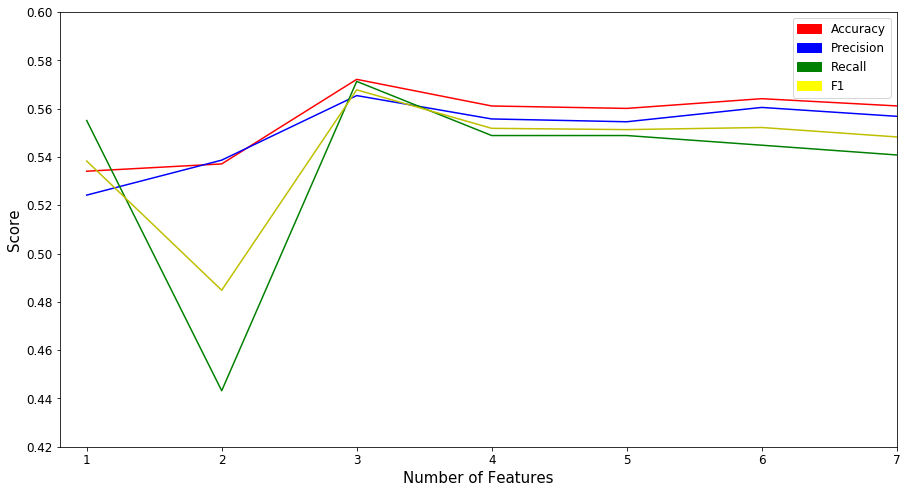

In [70]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8

plt.rcParams.update({'font.size': 12})

plt.plot(all_stats["Accuracy"], 'r-', all_stats["Precision"], 'b-', all_stats["Recall"], 'g-', all_stats["F1"], 'y-')
plt.axis([0.8, 7, 0.42, 0.6])
plt.ylabel("Score", fontsize=15)
plt.xlabel("Number of Features", fontsize=15)

red_patch = mpatches.Patch(color='red', label='Accuracy')
blue_patch = mpatches.Patch(color='blue', label='Precision')
green_patch = mpatches.Patch(color='green', label='Recall')
yellow_patch = mpatches.Patch(color='yellow', label='F1')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8

plt.rcParams.update({'font.size': 12})
plt.savefig('CrossValidatedFeatureComparison.pdf')
plt.show()

The graphed results highlight some interesting aspects of these features. It's notable that the addition of handsetAge as the second feature slightly increases the Precision but sends the Recall value plummeting. This implies that the pair of creditRatingNum and handsetAge, while allowing for slightly more precise guessing, actually greatly decreases the number of correctly predicted churn cases. It's also notable that, while most values gradually reduce with the addition of every feature after avgBills as the third, Accuracy and Precision see slight boosts with the addition of the numRetentionOffersRejected feature as the sixth. This may imply that, while catching less of the churn cases ultimately, numRetentionOffersRejected gives a degree of extra precision.

This is mostly irrelevant, however, as the graph reveals the third cross-validated model, including creditRatingNum, handsetAge, and avgMins, to be the strongest model for all metrics. This combination of features reduces the random noise of the later features while overcoming the drastic drop in recall from handsetAge. This new model should provide the best results whether accuracy, recall, or precision is the aim.

Based on the key turning points of the graph below, I tested a few alternative feature sets:

Same as the 3-feature model, but with the addition of **numRetentionOffersRejected**

In [71]:
X_alt = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
                'avgMins',
                'numRetentionOffersRejected'
             ]]

print("With 4 features (incl. numRetentionOffersRejected):", list(X_alt.columns)[1:])
X_alt_stats = stat_maker(X_alt, y)
X_alt_stats

With 4 features (incl. numRetentionOffersRejected): ['creditRatingNum', 'handsetAge', 'avgMins', 'numRetentionOffersRejected']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.597015,0.602273,0.535354,0.566845
2nd,0.472637,0.466019,0.484848,0.475248
3rd,0.575000,0.565657,0.571429,0.568528
4th,0.613065,0.596330,0.663265,0.628019
5th,0.577889,0.576087,0.540816,0.557895
Averages,0.567121,0.561273,0.559142,0.559307


Same as the 3-feature model, but replacing **handsetAge** with **numRetentionOffersRejected**.

In [72]:
X_alt_2 = df[['Intercept',                 
                'creditRatingNum', 
                'avgMins',
                'numRetentionOffersRejected'
             ]]

print("With 3 features (incl. numRetentionOffersRejected, excl. handsetAge):", list(X_alt.columns)[1:])
X_alt_stats = stat_maker(X_alt_2, y)
X_alt_stats

With 3 features (incl. numRetentionOffersRejected, excl. handsetAge): ['creditRatingNum', 'handsetAge', 'avgMins', 'numRetentionOffersRejected']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.577114,0.571429,0.565657,0.568528
2nd,0.467662,0.462264,0.494949,0.478049
3rd,0.575000,0.554622,0.673469,0.608295
4th,0.613065,0.594595,0.673469,0.631579
5th,0.547739,0.539216,0.561224,0.550000
Averages,0.556116,0.544425,0.593754,0.567290


Same as the 2-Feature model, but replacing **handsetAge** with **avgMins**.

In [73]:
X_alt_3 = df[['Intercept',
              'creditRatingNum',
                'avgMins',
             ]]

y = df['churn']
print("With 2 features (incl. avgMins, excl. handsetAge):", list(X_alt.columns)[1:])
X_alt_stats = stat_maker(X_alt_3, y)
X_alt_stats

With 2 features (incl. avgMins, excl. handsetAge): ['creditRatingNum', 'handsetAge', 'avgMins', 'numRetentionOffersRejected']


,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.542289,0.533981,0.555556,0.544554
2nd,0.457711,0.452830,0.484848,0.468293
3rd,0.575000,0.553719,0.683673,0.611872
4th,0.587940,0.570175,0.663265,0.613208
5th,0.527638,0.518868,0.561224,0.539216
Averages,0.538116,0.525915,0.589713,0.555429


The first and third of these tests can be disregarded, but the second alternative test, X_alt_2, while delivering worse results in terms of Accuracy, Precision, and F1 Score than the best of the other features, delivers a stronger Recall value than any other model. If the phone company's goal was to catch as many churn cases as possible, and was not so concerned about mis-classifying non-churn cases as churn cases, then this model would be the strongest one to use.

## Feature Re-Scaling

With the new set of features determined in the previous part, I can now re-scale my model to see if a standardised or normalised model will provide more reliable predictions. this may be of use, as the remaining values operate on very different scales.

In [74]:
X = df[['Intercept',                 
                'creditRatingNum', 
                'handsetAge', 
                'avgMins', 
             ]]
y = df['churn']

In [75]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Intercept,1000.0,1.00000,0.000000,1.0,1.0000,1.000,1.00,1.0
creditRatingNum,1000.0,5.02400,1.630976,1.0,4.0000,6.000,6.00,7.0
handsetAge,1000.0,373.09500,247.594897,1.0,203.0000,330.000,513.25,1463.0
avgMins,1000.0,559.14949,561.181571,0.0,176.3125,379.375,753.00,4093.5


The range of values in the three remaining features are:

| Feature | Min-Max Range |
|-|-|
|creditRatingNum| 1 - 7|
|handsetAge| 1 - 1463|
|avgMins| 1 - 4093.5|

And their interquartile range is:

| Feature | Interquartile Range |
|-|-|
|creditRatingNum| 4 - 6|
|handsetAge| 203 - 513.25|
|avgMins| 176.31 - 753|

Normalising or Standardising these values could greatly improve this model.

Normalising to place every value on a scale from 0 to 1, to improve relation-building.

In [76]:
X_norm = (X - X.min()) / (X.max() - X.min())
X_norm["Intercept"] = 1.
X_norm.head()

,Intercept,creditRatingNum,handsetAge,avgMins
0,1.0,0.833333,0.403557,0.093197
1,1.0,0.333333,0.454856,0.170453
2,1.0,0.500000,0.304378,0.003359
3,1.0,0.333333,0.028044,0.295285
4,1.0,0.500000,0.055404,0.290216


Putting the normalised model into stat_maker().

In [77]:
X_norm_stats = stat_maker(X_norm, y)
X_norm_stats

,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.577114,0.579545,0.515152,0.545455
2nd,0.497512,0.490566,0.525253,0.507317
3rd,0.580000,0.574468,0.551020,0.562500
4th,0.592965,0.584158,0.602041,0.592965
5th,0.562814,0.557895,0.540816,0.549223
Averages,0.562081,0.557327,0.546856,0.551492


Standardising values to reflect extreme differences from the norm when they take place.

In [78]:
X_st = (X - X.mean()) / X.std()
X_st["Intercept"] = 1.0
X_st.head()

,Intercept,creditRatingNum,handsetAge,avgMins
0,1.0,0.598415,0.880087,-0.316563
1,1.0,-1.240974,1.183001,0.246980
2,1.0,-0.627845,0.294453,-0.971877
3,1.0,-1.240974,-1.337245,1.157559
4,1.0,-0.627845,-1.175691,1.120583


Putting the standardised values into stat_maker().

In [79]:
X_st_stats = stat_maker(X_st, y)
X_st_stats

,Accuracy,Precision,Recall,F1
Test,,,,
1st,0.577114,0.576087,0.535354,0.554974
2nd,0.502488,0.495238,0.525253,0.509804
3rd,0.580000,0.574468,0.551020,0.562500
4th,0.587940,0.575472,0.622449,0.598039
5th,0.587940,0.583333,0.571429,0.577320
Averages,0.567096,0.560920,0.561101,0.560527


In [80]:
#X_comparison_stats = pd.DataFrame({"Model":list(X_3_stats.loc[5]), "Normalised Model":list(X_norm_stats.loc[5])})
X_stat_comparison = pd.DataFrame({'Model':X_3_stats.loc["Averages"], 'Normalised':X_norm_stats.loc["Averages"], 'Standardised':X_st_stats.loc["Averages"]})
X_stat_comparison.T

,Accuracy,Precision,Recall,F1
Model,0.572091,0.565371,0.571243,0.567753
Normalised,0.562081,0.557327,0.546856,0.551492
Standardised,0.567096,0.560920,0.561101,0.560527


Sadly, rescaling only reduces the accuracy, precision, and recall of the model, with standardised coming closer to the original evaluation, but still coming up short.

## Summarise your findings so far

Based on my tests so far, I have found that a Logistic Regression model based around the features **creditRatingNum**, **handsetAge**, and **avgMins** turns in the best results for the dataset provided. Upon a full cross-validated evaluation of this model, alongside alternatives that used more or less features, these three features came out on top. It works with 57% accuracy, and is weighted slightly more in favour of Recall than Precision, meaning that it is better at returning as many True Positives as possible, than it is at avoiding False Positives.

creditRatingNum was the feature with the strongest coefficient attached to it. This was a feature that I created myself, converting the values in the creditRating table to numerics, with A as the highest and G as the lowest. The rate of conversion was arbitrary, and it could possibly be adjusted to better reflect the significance between these grades.

Another feature that I created was **numRetentionOffersRejected**, based on the difference between the numRetentionCalls and numRetentionOffersAccepted features. The coefficient of this feature was extremely strong, as rejecting a retention offer naturally correlates with plans to change providers. However, it ultimately had to be left out as it caused more noise being left in, due to the fact that the vast majority of customers received no retention calls, and an even smaller subset of those customers rejected them. A more complex model, perhaps a tree-based one, could open by checking this feature, assuming churn if its value was greater than 0. This model could then feed all 0 results into the logistic regression model using the features above.

The Logistic Regression model fared only slightly better than its Linear counterpart. Given that the target value was a boolean, a greater difference was to be expected. It's possible that with a different set of features or a different data segment the difference between these two would have been more prominent.

# Final Word

57% is ultimately a disappointing Accuracy rating for this model, given the range of features available for making predictions with. It's possible that working on a larger data set, correlations that were not immediately visible in this dataset would have become apparent. Alternatively, a Neural Network model or a Random Forest, which we have not covered in class yet, might have been able to discover more about what leads to churn values in this dataset.